In [1]:
import pandas as pd
import random, os
from math import log, pow
%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
import numpy as np
from scipy import stats
import antibody_functions as AF

Importing modules...


ImportError: No module named rosetta

In [17]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [18]:
# fill in appropriate filenames and paths here

path_to_native_3ay4 = "/Users/Research/pyrosetta_git_repo/native_crystal_struct_3ay4_Fc_FcgRIII.pdb"
path_to_standard_lowest_E_pack_min_rounds_native_3ay4 = "/Users/Research/pyrosetta_git_repo/structures_from_jazz/3ay4_Fc_FcgRIIIa/pack_min_rounds_only/lowest_E_structs/native_crystal_struct_3ay4_Fc_FcgRIII/native_crystal_struct_3ay4_Fc_FcgRIII_956.pdb"
path_to_lowest_E_single_pack_min_native_3ay4 = "/Users/Research/pyrosetta_git_repo/lowest_E_single_pack_and_min_only_native_crystal_struct_3ay4_Fc_FcgRIII.pdb"
path_to_lowest_E_single_pack_min_then_sample_domain_motion_with_fa_elec_native_3ay4 = "/Users/Research/pyrosetta_git_repo/lowest_E_single_pack_and_min_only_then_sample_domain_motions_with_fa_elec_native_crystal_struct_3ay4_Fc_FcgRIII.pdb"
path_to_lowest_E_single_pack_min_then_sample_domain_motion_native_3ay4 = "/Users/Research/pyrosetta_git_repo/lowest_E_single_pack_and_min_only_then_sample_domain_motions_native_crystal_struct_3ay4_Fc_FcgRIII.pdb"


# for use in making the RMSD plots and contact map below
lowest_E_muts_3ay4_dir = "/Users/Research/pyrosetta_git_repo/testing_mut_structs/best_structs/"

In [19]:
# dictionary of each mutation and its corresponding binding affinity ratio
# RE: Shields, et al. 2001
binding_affinity_dict = { "lowest_E_single_pack_and_min_only_native_crystal_struct_3ay4_Fc_FcgRIII": 1, "S298A_T256A": 1.41, "S298A_E333A_K334A": 1.51, "D265N": 0.02, "S267T": 0.05, "E233P":0.04, "P238A":0.07, "D265A":0.09, "A327Q":0.06, "P329A":0.21, "D270A":0.14, "Q295A":0.25, "A327S":0.06, "T256A":1.32, "K290A":1.31, "R255A":0.98, "E258A":1.12, "S267A":1.05, "E272A":0.8, "N276A":0.95, "D280A":1.09, "H285A":0.87, "N286A":1.05, "T307A":1.09, "L309A":1.07, "N315A":1.07, "K326A":1.23, "P331A":1.08, "S337A":0.94, "A378Q":1.19, "E430A":1.2, "H268A":0.54, "R301A":0.22, "K322A":0.62, "R292A":0.89, "K414A":0.82, "S298A":1.34, "S239A":0.26, "E269A":0.45, "E293A":0.31, "Y296G":0.55, "V303A":0.33, "A327G":0.36, "K338A":0.15, "D376A":0.55, "E333A":1.27, "K334A":1.39, "A339T":1.34 }

## do I need this?
##### collect the full path names of all of the mutant structures that were manually moved into the low E directory
low_E_muts_3ay4 = []
for f in os.listdir( low_E_muts_3ay4_dir ):
    if f.endswith( ".pdb" ):
        low_E_muts_3ay4.append( low_E_muts_3ay4_dir + f )

# Mutational data for glycosylated 3ay4 and its mutations
### No sampling of movements – just one round of packing and minimization to get low E standard structure

In [20]:
path_to_native_vs_single_pack_min_data = "/Users/Research/pyrosetta_git_repo/lowest_E_single_pack_min_only_vs_mutants.csv"
native_vs_single_pack_min = pd.read_csv( path_to_native_vs_single_pack_min_data )
native_vs_single_pack_min = native_vs_single_pack_min.sort( "Pose Score" )
native_vs_single_pack_min

,Mutation Made,Pose Score,dG Scores,Elec Score,dG Elec Scores,Interface Score,dG Interface,Num Hbonds,delta Hbonds,interface contacts,lost native interface contacts,new interface contacts,total change interface contacts,Interface SASA,delta Interface SASA,rmsd
893,native_crystal_struct_3ay4_Fc_FcgRIII_903.pdb,-876.146398,-1677.615885,-238.742526,-69.060881,-34.971854,-14.053149,465,82,730,-169,135,-34,2498.422821,-28.480135,0.697906
930,native_crystal_struct_3ay4_Fc_FcgRIII_937.pdb,-876.144380,-1677.613868,-238.752993,-69.071348,-34.977314,-14.058609,465,82,730,-169,135,-34,2496.133741,-30.769216,0.697821
934,native_crystal_struct_3ay4_Fc_FcgRIII_940.pdb,-876.133834,-1677.603322,-238.759131,-69.077486,-34.972815,-14.054110,465,82,730,-169,135,-34,2498.440461,-28.462496,0.698003
984,native_crystal_struct_3ay4_Fc_FcgRIII_986.pdb,-876.131394,-1677.600882,-238.774490,-69.092845,-34.980301,-14.061596,465,82,728,-171,135,-36,2496.772159,-30.130798,0.697994
991,native_crystal_struct_3ay4_Fc_FcgRIII_992.pdb,-876.124552,-1677.594039,-238.777119,-69.095474,-34.978074,-14.059369,465,82,728,-171,135,-36,2496.772159,-30.130798,0.697948
938,native_crystal_struct_3ay4_Fc_FcgRIII_944.pdb,-876.115061,-1677.584549,-238.768940,-69.087294,-34.973448,-14.054743,465,82,728,-171,135,-36,2495.924487,-30.978469,0.697921
968,native_crystal_struct_3ay4_Fc_FcgRIII_971.pdb,-876.114925,-1677.584413,-238.778221,-69.096576,-34.975593,-14.056888,465,82,728,-171,135,-36,2497.092888,-29.810068,0.697822
931,native_crystal_struct_3ay4_Fc_FcgRIII_938.pdb,-876.113911,-1677.583399,-238.775683,-69.094038,-34.975880,-14.057174,465,82,730,-169,135,-34,2498.662343,-28.240614,0.698146
935,native_crystal_struct_3ay4_Fc_FcgRIII_941.pdb,-876.112855,-1677.582342,-238.769183,-69.087538,-34.974285,-14.055580,465,82,730,-169,135,-34,2498.440461,-28.462496,0.697983
940,native_crystal_struct_3ay4_Fc_FcgRIII_946.pdb,-876.110697,-1677.580185,-238.785072,-69.103426,-34.973226,-14.054521,465,82,728,-171,135,-36,2496.037934,-30.865023,0.697866


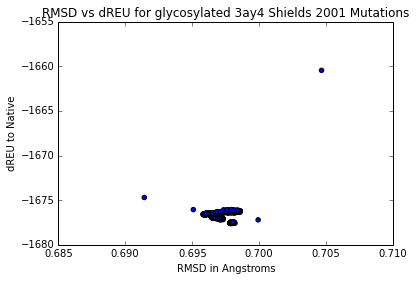

In [21]:
# RMSD vs Score
rmsd_list = native_vs_single_pack_min["rmsd"]
score_list = native_vs_single_pack_min["dG Scores"]

plot_title = "RMSD vs Score - native 3ay4 vs 1000 single pack_min structs.png"

# make scatter plot
plt.scatter( rmsd_list, score_list )
plt.xlabel( "RMSD in Angstroms" )
plt.ylabel( "dREU to Native" )
plt.title( "RMSD vs dREU for glycosylated 3ay4 Shields 2001 Mutations")
#plt.savefig( plot_title, dpi=120, transparent=True )
plt.show()

# Mutational data for glycosylated 3ay4 and its mutations
### After 2 by 2 pack and minimization round

In [28]:
path_to_native_vs_multiple_pack_min_data = "/Users/Research/pyrosetta_git_repo/lowest_E_pack_min_rounds_only_vs_mutants.csv"
native_vs_multiple_pack_min = pd.read_csv( path_to_native_vs_multiple_pack_min_data )
native_vs_multiple_pack_min = native_vs_multiple_pack_min.sort( "Pose Score" )
native_vs_multiple_pack_min

,Mutation Made,Pose Score,dG Scores,Elec Score,dG Elec Scores,Interface Score,dG Interface,Num Hbonds,delta Hbonds,interface contacts,lost native interface contacts,new interface contacts,total change interface contacts,Interface SASA,delta Interface SASA,rmsd
1,A327Q_799.pdb,-909.521195,-7.240686,-246.167679,-2.391749,-36.684906,0.097473,462,-4,643,-49,40,-9,2352.304112,-30.502925,0.098385
10,E233P_976.pdb,-905.915910,-3.635401,-244.590729,-0.814799,-36.822632,-0.040252,463,-3,644,-24,16,-8,2371.628538,-11.178500,0.102770
6,D270A_835.pdb,-904.336087,-2.055578,-242.677429,1.098501,-36.664170,0.118209,466,0,652,-4,4,0,2377.665709,-5.141329,0.007513
45,R292A_993.pdb,-903.650041,-1.369532,-243.401706,0.374224,-36.709465,0.072915,466,0,650,-3,1,-2,2366.887029,-15.920009,0.006535
19,H268A_14.pdb,-903.497653,-1.217144,-243.017757,0.758173,-36.752393,0.029986,465,-1,653,0,1,1,2381.901189,-0.905849,0.005676
3,A339T_983.pdb,-903.496260,-1.215751,-244.130503,-0.354573,-36.783912,-0.001533,466,0,651,-1,0,-1,2382.995130,0.188092,0.002561
23,I253A_970.pdb,-903.478258,-1.197749,-243.437375,0.338555,-36.791387,-0.009008,466,0,651,-1,0,-1,2384.119145,1.312108,0.002276
17,E382A_843.pdb,-903.135597,-0.855088,-243.682355,0.093575,-36.781961,0.000418,466,0,652,0,0,0,2381.970443,-0.836594,0.002833
21,H433A_978.pdb,-903.123375,-0.842867,-243.748843,0.027087,-36.784445,-0.002066,466,0,651,-1,0,-1,2382.227790,-0.579248,0.002357
4,A378Q_4.pdb,-903.109050,-0.828541,-245.027510,-1.251580,-36.786426,-0.004047,466,0,652,0,0,0,2382.131983,-0.675055,0.003394


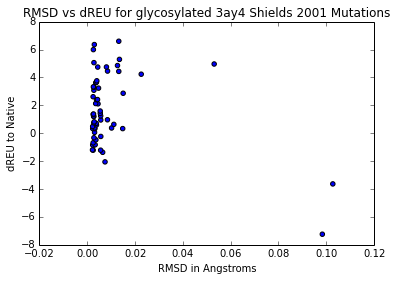

In [29]:
# RMSD vs Score
rmsd_list = native_vs_multiple_pack_min["rmsd"]
score_list = native_vs_multiple_pack_min["dG Scores"]

plot_title = "RMSD vs Score - native 3ay4 vs 1000 2 by 2 pack/min.png"

# make scatter plot
plt.scatter( rmsd_list, score_list )
plt.xlabel( "RMSD in Angstroms" )
plt.ylabel( "dREU to Native" )
plt.title( "RMSD vs dREU for glycosylated 3ay4 Shields 2001 Mutations")
#plt.savefig( plot_title, dpi=120, transparent=True )
plt.show()

R squared value: 0.132257697023


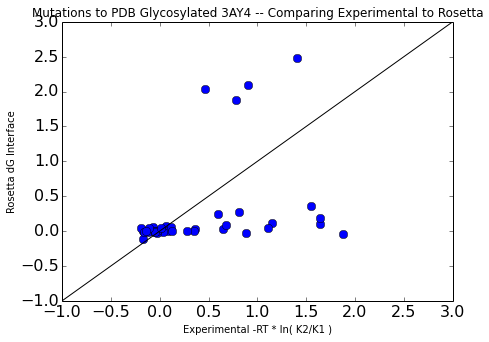

In [30]:
colors = [ 'b', 'g', 'c', 'm', 'k' ]

# constants
R = 1.987204118 * pow( 10, -3 )  # kcal K-1 mol-1
T = 293  # 25 degrees Celsius
dG_list = []
RTlnK2K1_list = []

# prepare the figure
plt.figure( 1, figsize=(7,5) )
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


for index in native_vs_multiple_pack_min.index:
    mutation_pdb_name = native_vs_multiple_pack_min["Mutation Made"][index]
    mutation_name = mutation_pdb_name.split( '_' )[0]
    
    dG = native_vs_multiple_pack_min["dG Interface"][index]
    
    if mutation_name in binding_affinity_dict:
        Ka = binding_affinity_dict[ mutation_name ]
    else:
        Ka = None
    
    if Ka != None:
        dG_list.append( dG )
        RTlnK2K1 = -1 * R * T * log( Ka )
        RTlnK2K1_list.append( RTlnK2K1 )
        
#        uncomment the below line if you want to see the values side-by-side
##        print mutation_name, "    Rosetta:", dG, "    Experimental:", RTlnK2K1
        
        plt.plot( RTlnK2K1, dG, 'o', color="blue", markersize=8 )

        
x_min = min(RTlnK2K1_list)
x_max = max(RTlnK2K1_list)
y_min = min(dG_list)
y_max = max(dG_list)

if x_min < y_min:
    ax_min = int(x_min) - 1
else:
    ax_min = int(y_min) - 1
if x_max > y_max:
    ax_max = int(x_max) + 1
else:
    ax_max = int(y_max) + 1
plt.plot( range( ax_min, ax_max + 1 ), range( ax_min, ax_max + 1 ), color='k')  # one-by-one line

x = np.array( RTlnK2K1_list )
y = np.array( dG_list )

slope, intercept, r_value, p_value, std_err = stats.linregress( x, y )
R_squared = r_value**2
print "R squared value:", R_squared

plt.xlim( ax_min, ax_max )
plt.ylim( ax_min, ax_max )
plt.xlabel( "Experimental -RT * ln( K2/K1 )" )
plt.ylabel( "Rosetta dG Interface" )
plt.title( "Mutations to PDB Glycosylated 3AY4 -- Comparing Experimental to Rosetta" )
#plt.savefig( "Mutations to PDB 3AY4 -- Comparing Experimental to Rosetta", dpi=120, transparent=True )
plt.show()

# Mutational data for glycosylated 3ay4 and its mutations
### After single pack and minimization round, sampled domain motions with fa_atr, fa_rep, and fa_elec ramping

In [22]:
path_to_native_vs_single_pack_min_then_sample_domain_with_elec_data = "/Users/Research/pyrosetta_git_repo/lowest_E_single_pack_min_then_sample_domain_motions_with_elec_vs_mutants.csv"
native_vs_single_pack_min_then_sample_domain_with_elec = pd.read_csv( path_to_native_vs_single_pack_min_then_sample_domain_with_elec_data )
native_vs_single_pack_min_then_sample_domain_with_elec = native_vs_single_pack_min_then_sample_domain_with_elec.sort( "dG Interface" )
native_vs_single_pack_min_then_sample_domain_with_elec

,Mutation Made,Pose Score,dG Scores,Elec Score,dG Elec Scores,Interface Score,dG Interface,Num Hbonds,delta Hbonds,interface contacts,lost native interface contacts,new interface contacts,total change interface contacts,Interface SASA,delta Interface SASA,rmsd
297,Y296F_968.pdb,-885.773439,-9.695299,-239.538574,-0.759718,-36.791209,-1.815122,467,2,722,-118,112,-6,2537.288628,40.069665,0.171238
294,Y296F_849.pdb,-885.750374,-9.672234,-239.582294,-0.803438,-36.741936,-1.765849,467,2,727,-117,116,-1,2546.013141,48.794178,0.172228
293,Y296F_808.pdb,-885.686830,-9.608690,-239.502985,-0.724129,-36.728666,-1.752580,467,2,726,-117,115,-2,2542.121212,44.902249,0.183408
296,Y296F_928.pdb,-885.724640,-9.646500,-239.525217,-0.746360,-36.691729,-1.715642,467,2,728,-116,116,0,2544.319566,47.100603,0.178139
295,Y296F_890.pdb,-885.755211,-9.677071,-239.574303,-0.795446,-36.679211,-1.703125,467,2,723,-117,112,-5,2537.262665,40.043702,0.195359
180,N286A_839.pdb,-885.528300,-9.450160,-239.169895,-0.391039,-36.534640,-1.558553,467,2,733,-22,27,5,2524.623464,27.404501,0.175289
181,N286A_901.pdb,-885.432696,-9.354557,-239.143395,-0.364539,-36.508163,-1.532077,467,2,732,-25,29,4,2535.576731,38.357768,0.163149
182,N286A_962.pdb,-885.831679,-9.753539,-239.407750,-0.628894,-36.506443,-1.530357,467,2,729,-25,26,1,2522.033946,24.814983,0.175717
254,S298A_645.pdb,-885.376897,-9.298757,-238.709260,0.069596,-36.447162,-1.471075,465,0,720,-54,46,-8,2540.296295,43.077332,0.174538
257,S298A_792.pdb,-885.361077,-9.282938,-238.698364,0.080493,-36.427867,-1.451781,465,0,720,-54,46,-8,2539.698160,42.479196,0.177734


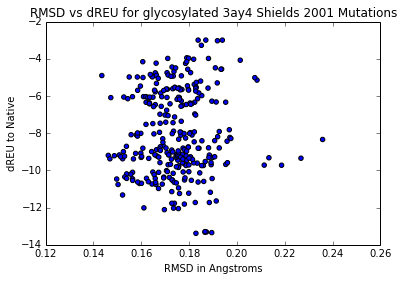

In [23]:
# RMSD vs Score
rmsd_list = native_vs_single_pack_min_then_sample_domain_with_elec["rmsd"]
score_list = native_vs_single_pack_min_then_sample_domain_with_elec["dG Scores"]

plot_title = "RMSD vs Score - native 3ay4 vs 1000 single pack/min then sample domain with fa_elec structs.png"

# make scatter plot
plt.scatter( rmsd_list, score_list )
plt.xlabel( "RMSD in Angstroms" )
plt.ylabel( "dREU to Native" )
plt.title( "RMSD vs dREU for glycosylated 3ay4 Shields 2001 Mutations")
#plt.savefig( plot_title, dpi=120, transparent=True )
plt.show()

R squared value: 0.233867734826


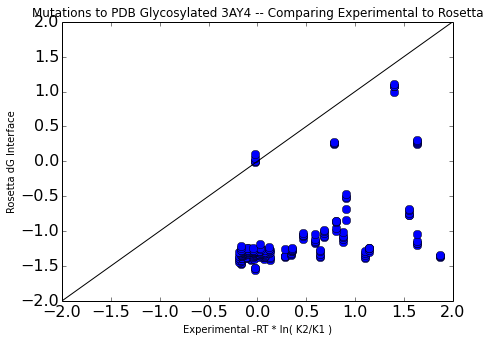

In [24]:
colors = [ 'b', 'g', 'c', 'm', 'k' ]

# constants
R = 1.987204118 * pow( 10, -3 )  # kcal K-1 mol-1
T = 293  # 25 degrees Celsius
dG_list = []
RTlnK2K1_list = []

# prepare the figure
plt.figure( 1, figsize=(7,5) )
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


for index in native_vs_single_pack_min_then_sample_domain_with_elec.index:
    mutation_pdb_name = native_vs_single_pack_min_then_sample_domain_with_elec["Mutation Made"][index]
    mutation_name = mutation_pdb_name.split( '_' )[0]
    
    dG = native_vs_single_pack_min_then_sample_domain_with_elec["dG Interface"][index]
    
    if mutation_name in binding_affinity_dict:
        Ka = binding_affinity_dict[ mutation_name ]
    else:
        Ka = None
    
    if Ka != None:
        dG_list.append( dG )
        RTlnK2K1 = -1 * R * T * log( Ka )
        RTlnK2K1_list.append( RTlnK2K1 )
        
#        uncomment the below line if you want to see the values side-by-side
##        print mutation_name, "    Rosetta:", dG, "    Experimental:", RTlnK2K1
        
        plt.plot( RTlnK2K1, dG, 'o', color="blue", markersize=8 )

        
x_min = min(RTlnK2K1_list)
x_max = max(RTlnK2K1_list)
y_min = min(dG_list)
y_max = max(dG_list)

if x_min < y_min:
    ax_min = int(x_min) - 1
else:
    ax_min = int(y_min) - 1
if x_max > y_max:
    ax_max = int(x_max) + 1
else:
    ax_max = int(y_max) + 1
plt.plot( range( ax_min, ax_max + 1 ), range( ax_min, ax_max + 1 ), color='k')  # one-by-one line

x = np.array( RTlnK2K1_list )
y = np.array( dG_list )

slope, intercept, r_value, p_value, std_err = stats.linregress( x, y )
R_squared = r_value**2
print "R squared value:", R_squared

plt.xlim( ax_min, ax_max )
plt.ylim( ax_min, ax_max )
plt.xlabel( "Experimental -RT * ln( K2/K1 )" )
plt.ylabel( "Rosetta dG Interface" )
plt.title( "Mutations to PDB Glycosylated 3AY4 -- Comparing Experimental to Rosetta" )
#plt.savefig( "Mutations to PDB 3AY4 -- Comparing Experimental to Rosetta", dpi=120, transparent=True )
plt.show()

# Mutational data for glycosylated 3ay4 and its mutations
### After single pack and minimization round, sampled domain motions with fa_atr and fa_rep ramping

In [25]:
path_to_native_vs_single_pack_min_then_sample_domain_data = "/Users/Research/pyrosetta_git_repo/lowest_E_single_pack_min_then_sample_domain_motions_vs_mutants.csv"
native_vs_single_pack_min_then_sample_domain = pd.read_csv( path_to_native_vs_single_pack_min_then_sample_domain_data )
native_vs_single_pack_min_then_sample_domain = native_vs_single_pack_min_then_sample_domain.sort( "dG Interface" )
native_vs_single_pack_min_then_sample_domain

,Mutation Made,Pose Score,dG Scores,Elec Score,dG Elec Scores,Interface Score,dG Interface,Num Hbonds,delta Hbonds,interface contacts,lost native interface contacts,new interface contacts,total change interface contacts,Interface SASA,delta Interface SASA,rmsd
9,A327Q_948.pdb,-887.579755,-11.501616,-240.825820,-2.046964,-38.053440,-3.077353,467,2,748,-39,59,20,2574.281510,77.062546,0.254484
8,A327Q_891.pdb,-887.598996,-11.520856,-240.837191,-2.058335,-38.049208,-3.073121,467,2,741,-41,54,13,2561.505963,64.287000,0.257247
7,A327Q_783.pdb,-887.599875,-11.521735,-240.815869,-2.037012,-38.046300,-3.070213,467,2,744,-39,55,16,2567.225772,70.006809,0.252470
6,A327Q_613.pdb,-887.601374,-11.523234,-240.888783,-2.109927,-38.038077,-3.061991,467,2,747,-37,56,19,2571.821945,74.602982,0.254419
5,A327Q_551.pdb,-887.648441,-11.570301,-240.856006,-2.077149,-37.965124,-2.989038,468,3,744,-37,53,16,2564.403194,67.184231,0.257503
229,R292A_815.pdb,-884.249201,-8.171061,-238.940594,-0.161738,-36.754545,-1.778459,467,2,734,-18,24,6,2522.391513,25.172550,0.182863
187,N434A_631.pdb,-880.231601,-4.153461,-238.005008,0.773848,-36.752054,-1.775968,466,1,737,-19,28,9,2534.619267,37.400304,0.162126
186,N434A_533.pdb,-880.024039,-3.945899,-238.018892,0.759964,-36.751572,-1.775486,466,1,737,-20,29,9,2535.614182,38.395219,0.174612
107,H433A_416.pdb,-884.554413,-8.476274,-238.923714,-0.144858,-36.743884,-1.767798,466,1,731,-21,24,3,2538.826418,41.607455,0.184105
106,H433A_220.pdb,-884.591326,-8.513187,-239.116058,-0.337202,-36.733251,-1.757165,466,1,730,-22,24,2,2534.996180,37.777217,0.190292


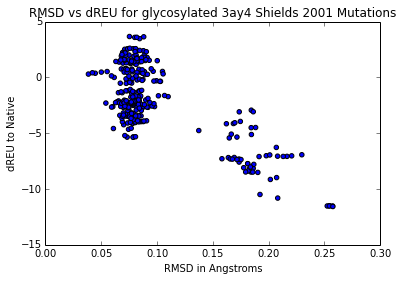

In [26]:
# RMSD vs Score
rmsd_list = native_vs_single_pack_min_then_sample_domain["rmsd"]
score_list = native_vs_single_pack_min_then_sample_domain["dG Scores"]

plot_title = "RMSD vs Score - native 3ay4 vs 1000 single pack/min then sample domain structs.png"

# make scatter plot
plt.scatter( rmsd_list, score_list )
plt.xlabel( "RMSD in Angstroms" )
plt.ylabel( "dREU to Native" )
plt.title( "RMSD vs dREU for glycosylated 3ay4 Shields 2001 Mutations")
#plt.savefig( plot_title, dpi=120, transparent=True )
plt.show()

R squared value: 0.0166844756928


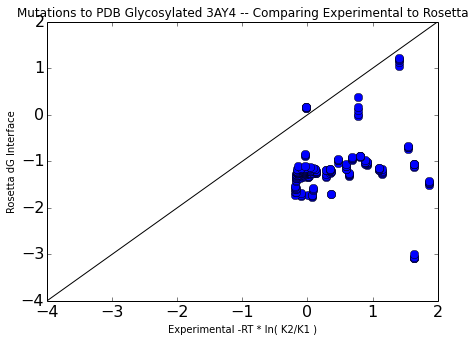

In [27]:
colors = [ 'b', 'g', 'c', 'm', 'k' ]

# constants
R = 1.987204118 * pow( 10, -3 )  # kcal K-1 mol-1
T = 293  # 25 degrees Celsius
dG_list = []
RTlnK2K1_list = []

# prepare the figure
plt.figure( 1, figsize=(7,5) )
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)


for index in native_vs_single_pack_min_then_sample_domain.index:
    mutation_pdb_name = native_vs_single_pack_min_then_sample_domain["Mutation Made"][index]
    mutation_name = mutation_pdb_name.split( '_' )[0]
    
    dG = native_vs_single_pack_min_then_sample_domain["dG Interface"][index]
    
    if mutation_name in binding_affinity_dict:
        Ka = binding_affinity_dict[ mutation_name ]
    else:
        Ka = None
    
    if Ka != None:
        dG_list.append( dG )
        RTlnK2K1 = -1 * R * T * log( Ka )
        RTlnK2K1_list.append( RTlnK2K1 )
        
#        uncomment the below line if you want to see the values side-by-side
##        print mutation_name, "    Rosetta:", dG, "    Experimental:", RTlnK2K1
        
        plt.plot( RTlnK2K1, dG, 'o', color="blue", markersize=8 )

        
x_min = min(RTlnK2K1_list)
x_max = max(RTlnK2K1_list)
y_min = min(dG_list)
y_max = max(dG_list)

if x_min < y_min:
    ax_min = int(x_min) - 1
else:
    ax_min = int(y_min) - 1
if x_max > y_max:
    ax_max = int(x_max) + 1
else:
    ax_max = int(y_max) + 1
plt.plot( range( ax_min, ax_max + 1 ), range( ax_min, ax_max + 1 ), color='k')  # one-by-one line

x = np.array( RTlnK2K1_list )
y = np.array( dG_list )

slope, intercept, r_value, p_value, std_err = stats.linregress( x, y )
R_squared = r_value**2
print "R squared value:", R_squared

plt.xlim( ax_min, ax_max )
plt.ylim( ax_min, ax_max )
plt.xlabel( "Experimental -RT * ln( K2/K1 )" )
plt.ylabel( "Rosetta dG Interface" )
plt.title( "Mutations to PDB Glycosylated 3AY4 -- Comparing Experimental to Rosetta" )
#plt.savefig( "Mutations to PDB 3AY4 -- Comparing Experimental to Rosetta", dpi=120, transparent=True )
plt.show()

# Mutational data for aglycosylated 3ay4 and its mutations
### No sampling of movements – just packing and minimization rounds

In [32]:
mut_3ay4_with_no_glycan_df = pd.read_csv( path_to_3ay4_with_no_glycan_mutational_data )
mut_3ay4_with_no_glycan_df

NameError: name 'path_to_3ay4_with_no_glycan_mutational_data' is not defined

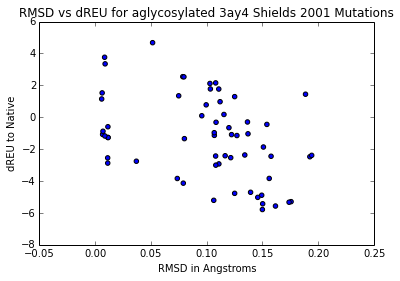

In [10]:
# RMSD vs Score
rmsd_list = mut_3ay4_with_no_glycan_df["rmsd"]
score_list = mut_3ay4_with_no_glycan_df["dG Scores"]

plot_title = "RMSD vs Score - Mutation following pack and minimization.png"

# make scatter plot
plt.scatter( rmsd_list, score_list )
plt.xlabel( "RMSD in Angstroms" )
plt.ylabel( "dREU to Native" )
plt.title( "RMSD vs dREU for aglycosylated 3ay4 Shields 2001 Mutations")
plt.savefig( plot_title, dpi=120, transparent=True )
plt.show()

R squared value: 0.0717264969233


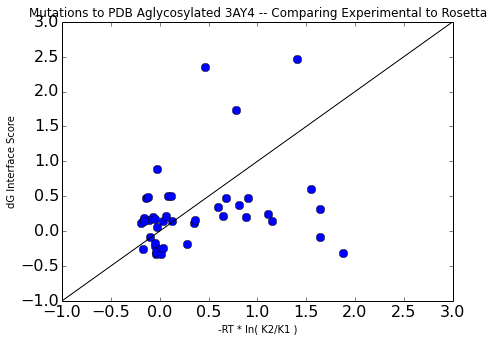

In [12]:
colors = [ 'b', 'g', 'c', 'm', 'k' ]

# constants
R = 1.987204118 * pow( 10, -3 )  # kcal K-1 mol-1
T = 293  # 25 degrees Celsius
dG_score_list = []
#SASA_list = []
RTlnK2K1_list = []

# prepare the figure
plt.figure( 1, figsize=(7,5) )
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

for index in mut_3ay4_with_no_glycan_df.index:
    mutation_pdb_name = mut_3ay4_with_no_glycan_df["Mutation Made"][index]
#    mutation_name = mutation_pdb_name.split(".pdb")[0]
    mutation_name = mutation_pdb_name.split("Best_")[-1]
    mutation = '_'.join( mutation_name.split( '.pdb' )[:-1] )
    
    dG_score = mut_3ay4_with_no_glycan_df["dG Interface"][index]
    
    if mutation in binding_affinity_dict:
        Ka = binding_affinity_dict[mutation]
    else:
        Ka = None
    
    if Ka != None:
        RTlnK2K1 = -1 * R * T * log( Ka )
        dG_score_list.append( dG_score )
        RTlnK2K1_list.append( RTlnK2K1 )
        
#        uncomment the below line if you want to see the values side-by-side
##        print mutation_name, "    Rosetta:", dG, "    Experimental:", RTlnK2K1

        if mutation.split( '_' )[0] == "Pack":
            plt.plot( RTlnK2K1, dG_score, 'o', color="red", markersize=8 )
        else:
            plt.plot( RTlnK2K1, dG_score, 'o', color="blue", markersize=8 )

x_min = min(RTlnK2K1_list)
x_max = max(RTlnK2K1_list)
y_min = min(dG_score_list)
y_max = max(dG_score_list)

if x_min < y_min:
    ax_min = int(x_min) - 1
else:
    ax_min = int(y_min) - 1
if x_max > y_max:
    ax_max = int(x_max) + 1
else:
    ax_max = int(y_max) + 1
plt.plot( range( ax_min, ax_max + 1 ), range( ax_min, ax_max + 1 ), color='k')  # one-by-one line

x = np.array( RTlnK2K1_list )
y = np.array( dG_score_list )

slope, intercept, r_value, p_value, std_err = stats.linregress( x, y )
R_squared = r_value**2
print "R squared value:", R_squared

#plt.xlim( ax_min, ax_max )
#plt.ylim( ax_min, ax_max )
plt.xlabel( "-RT * ln( K2/K1 )" )
plt.ylabel( "dG Interface Score" )
plt.title( "Mutations to PDB Aglycosylated 3AY4 -- Comparing Experimental to Rosetta" )
#plt.savefig( "Mutations to PDB 3AY4 -- Comparing Experimental to Rosetta fa_elec", dpi=120, transparent=True )
plt.show()